$2(xy+y)y'+x(y^{4}+1)=0; y'=\frac{-x(y^{4}+1)}{2(xy+y)}; y(0)=1; y'(0.1)=2$

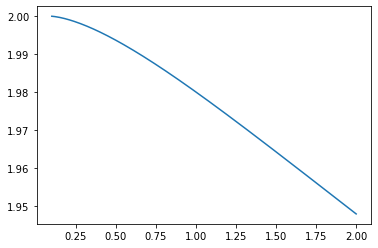

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as py

# Начальные условия: y(0.1)=2
x=sympy.symbols('x')
y=sympy.Function('y')(x)
x00=x0=0.1
y00=y0=2
h=0.01
E=10**(-4)
y_value=[] #Лист со значениями первой и второй производной

t=[x0] #Лист для отрисовки (аргумент x)
yy=[] #Лист для отрисовки (аргумент y)


def factorial(n): 
    if n==0:
        return 1
    return factorial(n-1)

def value(f,t,yy): #Значение sympy функции
    f=sympy.Add(f)
    f=f.subs({x:t,y:yy})
    return float(f)

def derivative(func): #Производная неявной функции с y=y(x)
    f=sympy.idiff(func,y,x)
    return f

def Teilor(y1,y2,x):  #Тейлор до второй производной
    
    return y00+h*y1/factorial(1)*(x-x00)+(h/2)*y2/factorial(2)*(x-x00)**2

def delta_X(x,h):
    return x+h

funcc=-x*(y**4+1)/(2*(x*y+y)) #Первая производная

val=value(funcc,x0,y0)
y_value.append(val)

func1=derivative(funcc) #Вторая производная


val=value(func1,x0,y0)
y_value.append(val)

y0=Teilor(y_value[0],y_value[1],x0)
yy.append(y0)

while abs(x0)<2:
    
    x0=delta_X(x0, h) #Изменение x
    t.append(x0)
    
    y0=Teilor(y_value[0],y_value[1],x0)
    yy.append(y0)
    
    val=value(funcc,x0,y0) 
    y_value[0]=val
    
    val=value(func1,x0,y0) 
    y_value[1]=val
    
py.plot(t,yy)